# Life Expectancy
---

### Analysis


In [14]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
from scipy.stats import linregress, pearsonr
import matplotlib.pyplot as plt
from pathlib import Path
# File to Load
life_expentancy_data = Path("Resources/Life expectancy data.csv")


# Read Life Expectancy File into Pandas DataFrames
life_expectancy = pd.read_csv(life_expentancy_data)



In [15]:
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [16]:
# Calculating the life expectancy for each country in 2000 and 2015
Life_exp = (life_expectancy[life_expectancy['Year'].isin([2000, 2015])]
          .pivot(index='Country', columns='Year', values='Life expectancy ')
          .add_prefix('Life exp in ').rename_axis(columns=None).reset_index()

# Calculating the difference between the two years
          .assign(Difference=lambda x: x['Life exp in 2015'] - x['Life exp in 2000'])

#Calculating the percent change in the two years
          .assign(Percent_change = lambda x: x['Difference'] / x['Life exp in 2000'] * 100))
          
Life_exp.head()

,Country,Life exp in 2000,Life exp in 2015,Difference,Percent_change
0,Afghanistan,54.8,65.0,10.2,18.613139
1,Albania,72.6,77.8,5.2,7.162534
2,Algeria,71.3,75.6,4.3,6.030856
3,Angola,45.3,52.4,7.1,15.673289
4,Antigua and Barbuda,73.6,76.4,2.8,3.804348


In [17]:
# Life expectancy in descending order
Life_exp.sort_values(by='Percent_change', ascending = False).head()

,Country,Life exp in 2000,Life exp in 2015,Difference,Percent_change
182,Zimbabwe,46.0,67.0,21.0,45.652174
53,Eritrea,45.3,64.7,19.4,42.825607
181,Zambia,43.8,61.8,18.0,41.095890
21,Botswana,47.8,65.7,17.9,37.447699
134,Rwanda,48.3,66.1,17.8,36.853002


In [18]:
# Calculate countries with minimum Life expectancy
Life_exp.sort_values(by='Life exp in 2015').head(10)

,Country,Life exp in 2000,Life exp in 2015,Difference,Percent_change
143,Sierra Leone,39.0,51.0,12.0,30.769231
3,Angola,45.3,52.4,7.1,15.673289
31,Central African Republic,46.0,52.5,6.5,14.130435
32,Chad,47.6,53.1,5.5,11.554622
43,Côte d'Ivoire,47.9,53.3,5.4,11.273486
92,Lesotho,49.3,53.7,4.4,8.924949
118,Nigeria,47.1,54.5,7.4,15.711253
148,Somalia,55.0,55.0,0.0,0.000000
29,Cameroon,51.4,57.3,5.9,11.478599
150,South Sudan,48.9,57.3,8.4,17.177914


In [19]:
# Calculating the GDP for each country in 2000 and 2015
GDP = (life_expectancy[life_expectancy['Year'].isin([2000, 2015])]
          .pivot(index='Country', columns='Year', values='GDP')
          .add_prefix('GDP in ').rename_axis(columns=None).reset_index()
       
# Calculating the difference between the two years
          .assign(Difference=lambda x: x['GDP in 2015'] - x['GDP in 2000'])

#Calculating the percent change for the two years
          .assign(Percent_change = lambda x: x['Difference'] / x['GDP in 2000'] * 100))
GDP.head()

,Country,GDP in 2000,GDP in 2015,Difference,Percent_change
0,Afghanistan,114.560000,584.259210,469.699210,410.002802
1,Albania,1175.788981,3954.227830,2778.438849,236.304209
2,Algeria,1757.177970,4132.762920,2375.584950,135.193190
3,Angola,555.296942,3695.793748,3140.496806,565.552692
4,Antigua and Barbuda,9875.161736,13566.954100,3691.792364,37.384627


In [20]:
# GDP in descending order
GDP.sort_values(by='Percent_change', ascending = False).head()

,Country,GDP in 2000,GDP in 2015,Difference,Percent_change
28,Cambodia,3.685949,1163.189770,1159.503821,31457.402720
122,Panama,46.299350,13134.436700,13088.137350,28268.512085
160,Thailand,27.564826,5814.863134,5787.298308,20995.228876
141,Serbia,87.136525,5237.255334,5150.118809,5910.401863
75,Indonesia,78.927440,3336.166860,3257.239420,4126.878333


In [21]:
#Clean Data
merge_df = pd.merge(Life_exp, GDP, on="Country", how="left")
merge_df.head()

,Country,Life exp in 2000,Life exp in 2015,Difference_x,Percent_change_x,GDP in 2000,GDP in 2015,Difference_y,Percent_change_y
0,Afghanistan,54.8,65.0,10.2,18.613139,114.560000,584.259210,469.699210,410.002802
1,Albania,72.6,77.8,5.2,7.162534,1175.788981,3954.227830,2778.438849,236.304209
2,Algeria,71.3,75.6,4.3,6.030856,1757.177970,4132.762920,2375.584950,135.193190
3,Angola,45.3,52.4,7.1,15.673289,555.296942,3695.793748,3140.496806,565.552692
4,Antigua and Barbuda,73.6,76.4,2.8,3.804348,9875.161736,13566.954100,3691.792364,37.384627


In [22]:
merge_df.count()

Country             183
Life exp in 2000    183
Life exp in 2015    183
Difference_x        183
Percent_change_x    183
GDP in 2000         154
GDP in 2015         154
Difference_y        150
Percent_change_y    150
dtype: int64

In [23]:
df = merge_df.dropna(how='any')

In [24]:
df.count()

Country             150
Life exp in 2000    150
Life exp in 2015    150
Difference_x        150
Percent_change_x    150
GDP in 2000         150
GDP in 2015         150
Difference_y        150
Percent_change_y    150
dtype: int64

In [25]:
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

The r-value between Life exp in 2000 and GDP in 2000 is 0.46


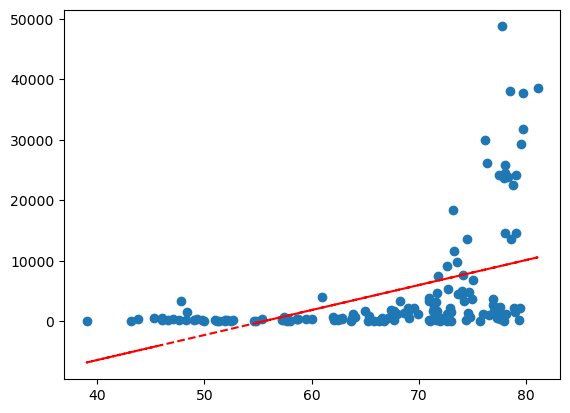

In [26]:
# LIfe expectancy in 2000
linear_reg(df['Life exp in 2000'], df['GDP in 2000'],(10, 10))

The r-value between Life exp in 2015 and GDP in 2015 is 0.45


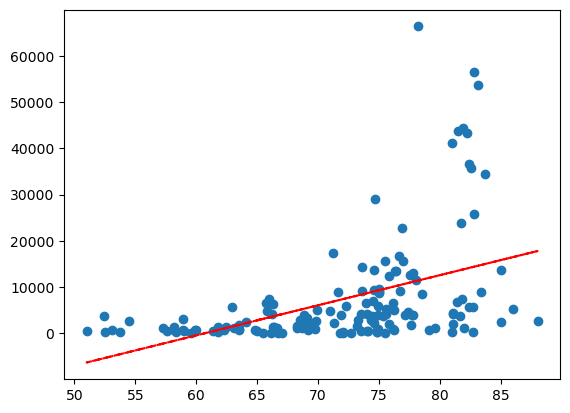

In [27]:
# LIfe expectancy in 2015
linear_reg(df['Life exp in 2015'], df['GDP in 2015'],(10, 10))